In [36]:
import cv2
# import matplotlib as plt
from matplotlib import pyplot as plt
import numpy as np

In [37]:
def advance_frames(ctr, target_ctr):
    for i in range (ctr, target_ctr):
        ret, frame = cap.read()
    return target_ctr

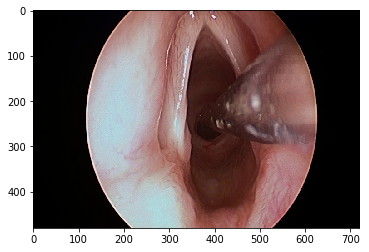

End!


In [39]:
######PARAMS######
#fps of the input video
fps=30
#start time for annotation (in seconds)
start_time_s= 63
#end time for annotation (in seconds)
end_time_s = 77
###ENDOF PARAMS###

cap = cv2.VideoCapture('/storage/vocal_chords_and_rings_data/nbs/20181010_12y_5031752 mild subglottic stenosis uneditted.mpg')
ctr = 0

#Advance video to starting point
for i in range(0,start_time_s*fps):
    ret, frame = cap.read()
    ctr+=1

print("Starting.")
while(cap.isOpened() and ctr <end_time_s*fps):
    
    ret, frame = cap.read()
    ctr+=1
    print(ctr)

    if np.shape(frame) == (): #i.e. empty frame
        break
    
    
    #Skip frames
    key = input()
    key = int(key)
    ctr = advance_frames(ctr,ctr+1+10*key)
    
    
    clear_output()
    plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite('/storage/vocal_chords_and_rings_data/data/images/captured/img_{}.png'.format(ctr),frame)
    
cap.release()
print ("End!")

In [ ]:
# from IPython.display import clear_output

# while True:
#     key = input()
#     if int(key)==1:
#         clear_output()
#         img = cv2.imread('/storage/vocal_chords_and_rings_data/data/images/01133d22-0000000.png')
#         plt.imshow(img)
#         plt.show()

# Zip it!

In [ ]:
tar -czf archive.tar.gz foldername